In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
path  =  'individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'MSFT_data.csv','GOOGL_data.csv','AMGN_data.csv']

In [27]:
all_result = pd.DataFrame()
for company in company_list:
    curr_df = pd.read_csv(path+'/'+company)
    all_result = pd.concat([all_result, curr_df])

In [28]:
all_result.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [29]:
all_result.shape

(5036, 7)

In [30]:
tech_list = all_result['Name'].unique()

In [31]:
all_result.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [32]:
all_result['date'] = pd.to_datetime(all_result['date'])

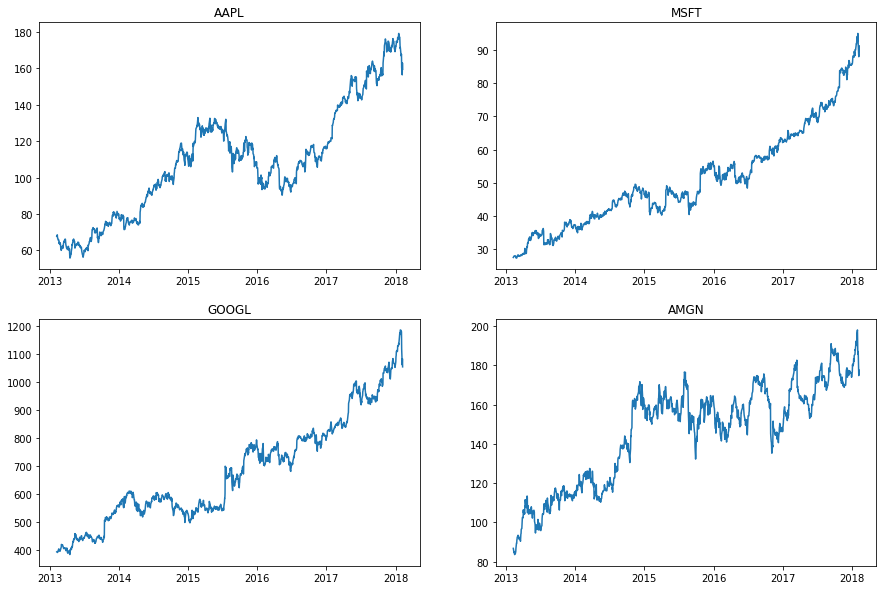

In [33]:
plt.figure(figsize=(15,10))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_result[all_result['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

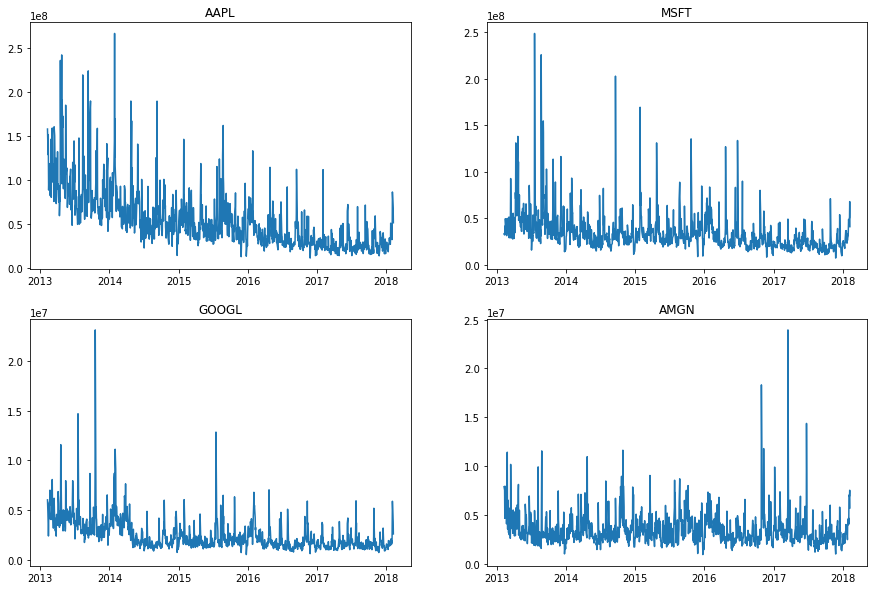

In [34]:
plt.figure(figsize=(15,10))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_result[all_result['Name'] == company]
    plt.plot(df['date'], df['volume'])
    plt.title(company)

In [35]:
import plotly.express as px

In [36]:
for company in tech_list:
    df = all_result[all_result['Name'] == company]
    fig = px.line(df, x = 'date', y= 'volume', title=company)
    fig.show()

daily price change = closing price - opening price
<br>
% percent = (daily price change / closing price)*100

In [51]:
df = pd.read_csv('individual_stocks_5yr/AAPL_data.csv')

In [38]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [39]:
df['daily_price_returns'] = df['close'] - df['open']

In [40]:
df.head()

,date,open,high,low,close,volume,Name,daily_price_returns
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [60]:
df['%daily_price_returns'] = ((df['close']-df['open'])/df['close'])*100

In [42]:
df.head()

,date,open,high,low,close,volume,Name,daily_price_returns,%daily_price_returns
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [43]:
fig = px.line(df, x = 'date', y='%daily_price_returns', title=' ')
fig.show()

In [68]:
df2 = df.copy()

In [71]:
df2.dtypes

date                    datetime64[ns]
open                           float64
high                           float64
low                            float64
close                          float64
volume                           int64
Name                            object
%daily_price_returns           float64
dtype: object

In [70]:
df2['date'] = pd.to_datetime(df2['date'])

In [72]:
df2.set_index('date',inplace=True)

In [73]:
df2.head()

,open,high,low,close,volume,Name,%daily_price_returns
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


<AxesSubplot:xlabel='date'>

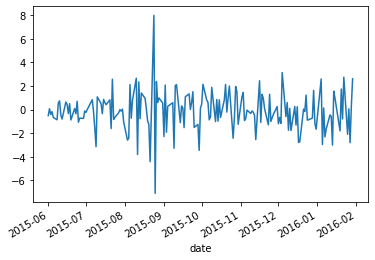

In [74]:
df2['2015-06-01':'2016-01-31']['%daily_price_returns'].plot()

<AxesSubplot:xlabel='date'>

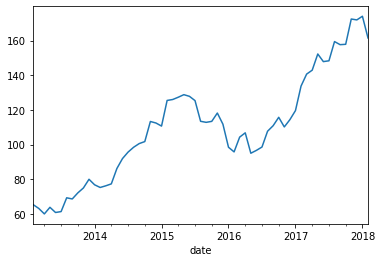

In [76]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

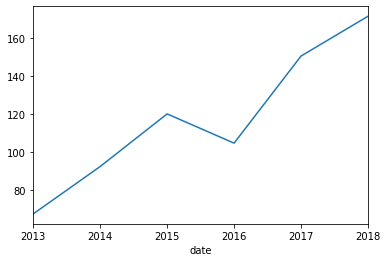

In [77]:
df2['close'].resample('Y').mean().plot()

In [79]:
close = pd.DataFrame()
for company in tech_list:
    df = all_result[all_result['Name']==company]
    close[company] = df['close']

In [80]:
close.head()

,AAPL,MSFT,GOOGL,AMGN
0,67.8542,27.55,393.0777,86.77
1,68.5614,27.86,391.6012,84.92
2,66.8428,27.88,390.7403,84.54
3,66.7156,28.03,391.8214,84.94
4,66.6556,28.04,394.3039,84.72


In [82]:
import seaborn as sns

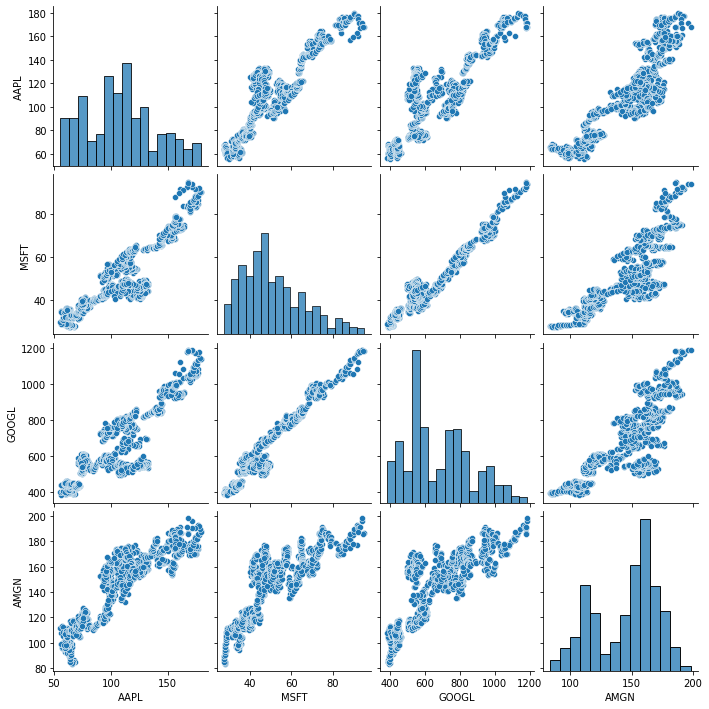

In [84]:
sns.pairplot(data=close)

<AxesSubplot:>

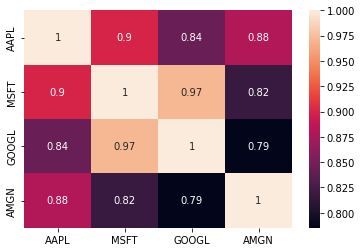

In [86]:
sns.heatmap(data=close.corr(),annot=True)

In [87]:
close = pd.DataFrame()
for company in tech_list:
    df = all_result[all_result['Name']==company]
    close[company] = ((df['close']-df['open'])/df['close'])*100

In [88]:
close.head()

,AAPL,MSFT,GOOGL,AMGN
0,0.206325,0.725953,0.667196,1.336868
1,0.714688,0.753769,0.513788,-0.659444
2,-2.481344,0.000000,-0.134514,-0.544121
3,-0.042869,0.356761,0.348705,-0.023546
4,0.443624,0.427960,1.026873,-1.510859


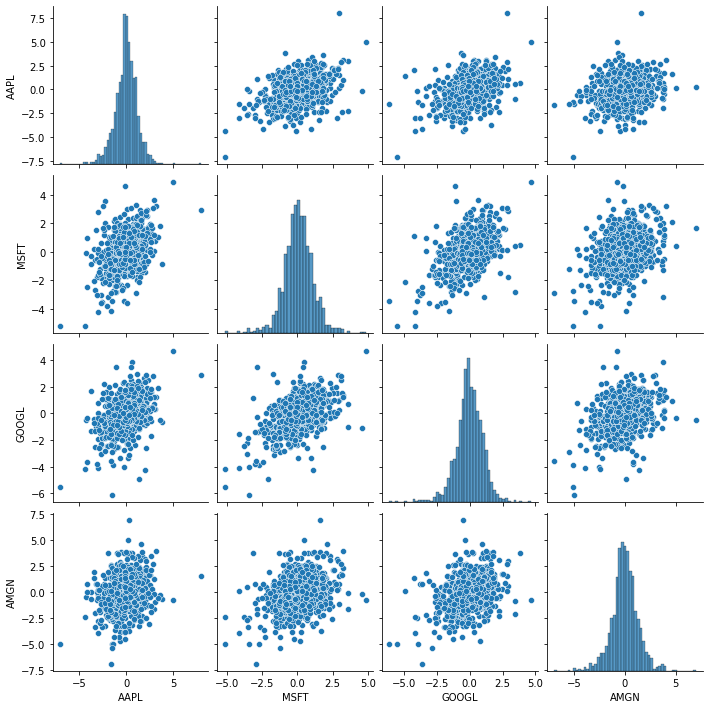

In [89]:
sns.pairplot(data=close)

<AxesSubplot:>

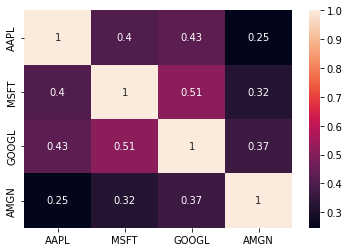

In [90]:
sns.heatmap(data=close.corr(), annot=True)

In [92]:
close.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
MSFT,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
GOOGL,1259.0,-0.028349,1.052191,-6.107290,-0.575799,-0.004508,0.624730,4.652214
AMGN,1259.0,-0.006999,1.337707,-6.907010,-0.704850,-0.012964,0.731484,6.948399
